/home/jbane/tritium/Tri_offline/yield/yield_output//100bins/xbj/C12_kin1.dat
/home/jbane/tritium/Tri_offline/MC_comparison/yield_output//100bins/xbj/C12_kin1.dat
C12_kin1
0          Xbj    Ne     Yield     Error     yield
18  0.185477  1283  0.009415  0.000280  0.009415
19  0.195047  1740  0.012909  0.000337  0.012909
20  0.204911  1597  0.011959  0.000324  0.011959
21  0.214955  1436  0.010848  0.000307  0.010848
22  0.224980  1309  0.009969  0.000294  0.009969
23  0.234762  1116  0.008567  0.000271  0.008567
24  0.244902   958  0.007411  0.000251  0.007411
25  0.254474   677  0.005284  0.000210  0.005284
0          Xbj       Q2    Ne     Yield     Error     yield
18  0.185556  2.62868  4242  10.07530  0.000155  0.010075
19  0.195225  2.75061  6860  15.11330  0.000182  0.015113
20  0.204938  2.88491  7115  14.12310  0.000167  0.014123
21  0.214974  3.02585  6881  12.23430  0.000147  0.012234
22  0.224953  3.16597  7019  11.21730  0.000134  0.011217
23  0.234947  3.30668  6885   9.9083

8          Xbj   Ne     Yield     Error     yield
39  0.395762  173  0.000393  0.000030  0.000393
40  0.405300  287  0.000656  0.000039  0.000656
41  0.415370  333  0.000765  0.000043  0.000765
42  0.425213  380  0.000877  0.000046  0.000877
43  0.435080  400  0.000928  0.000047  0.000928
44  0.445006  415  0.000967  0.000049  0.000967
45  0.455331  331  0.000775  0.000043  0.000775
46  0.464802  324  0.000761  0.000043  0.000761
47  0.475072  290  0.000684  0.000041  0.000684
48  0.484562  243  0.000576  0.000037  0.000576
49  0.494548  221  0.000526  0.000036  0.000526
50  0.504515  175  0.000418  0.000032  0.000418
51  0.514543   92  0.000221  0.000023  0.000221
52  0.524323   56  0.000135  0.000018  0.000135
8          Xbj       Q2    Ne     Yield     Error     yield
39  0.395821  5.63526  1373  0.398849  0.000011  0.000399
40  0.405377  5.75392  2377  0.648054  0.000013  0.000648
41  0.415317  5.87808  3474  0.884377  0.000015  0.000884
42  0.425213  5.99887  4274  1.017630  0.000

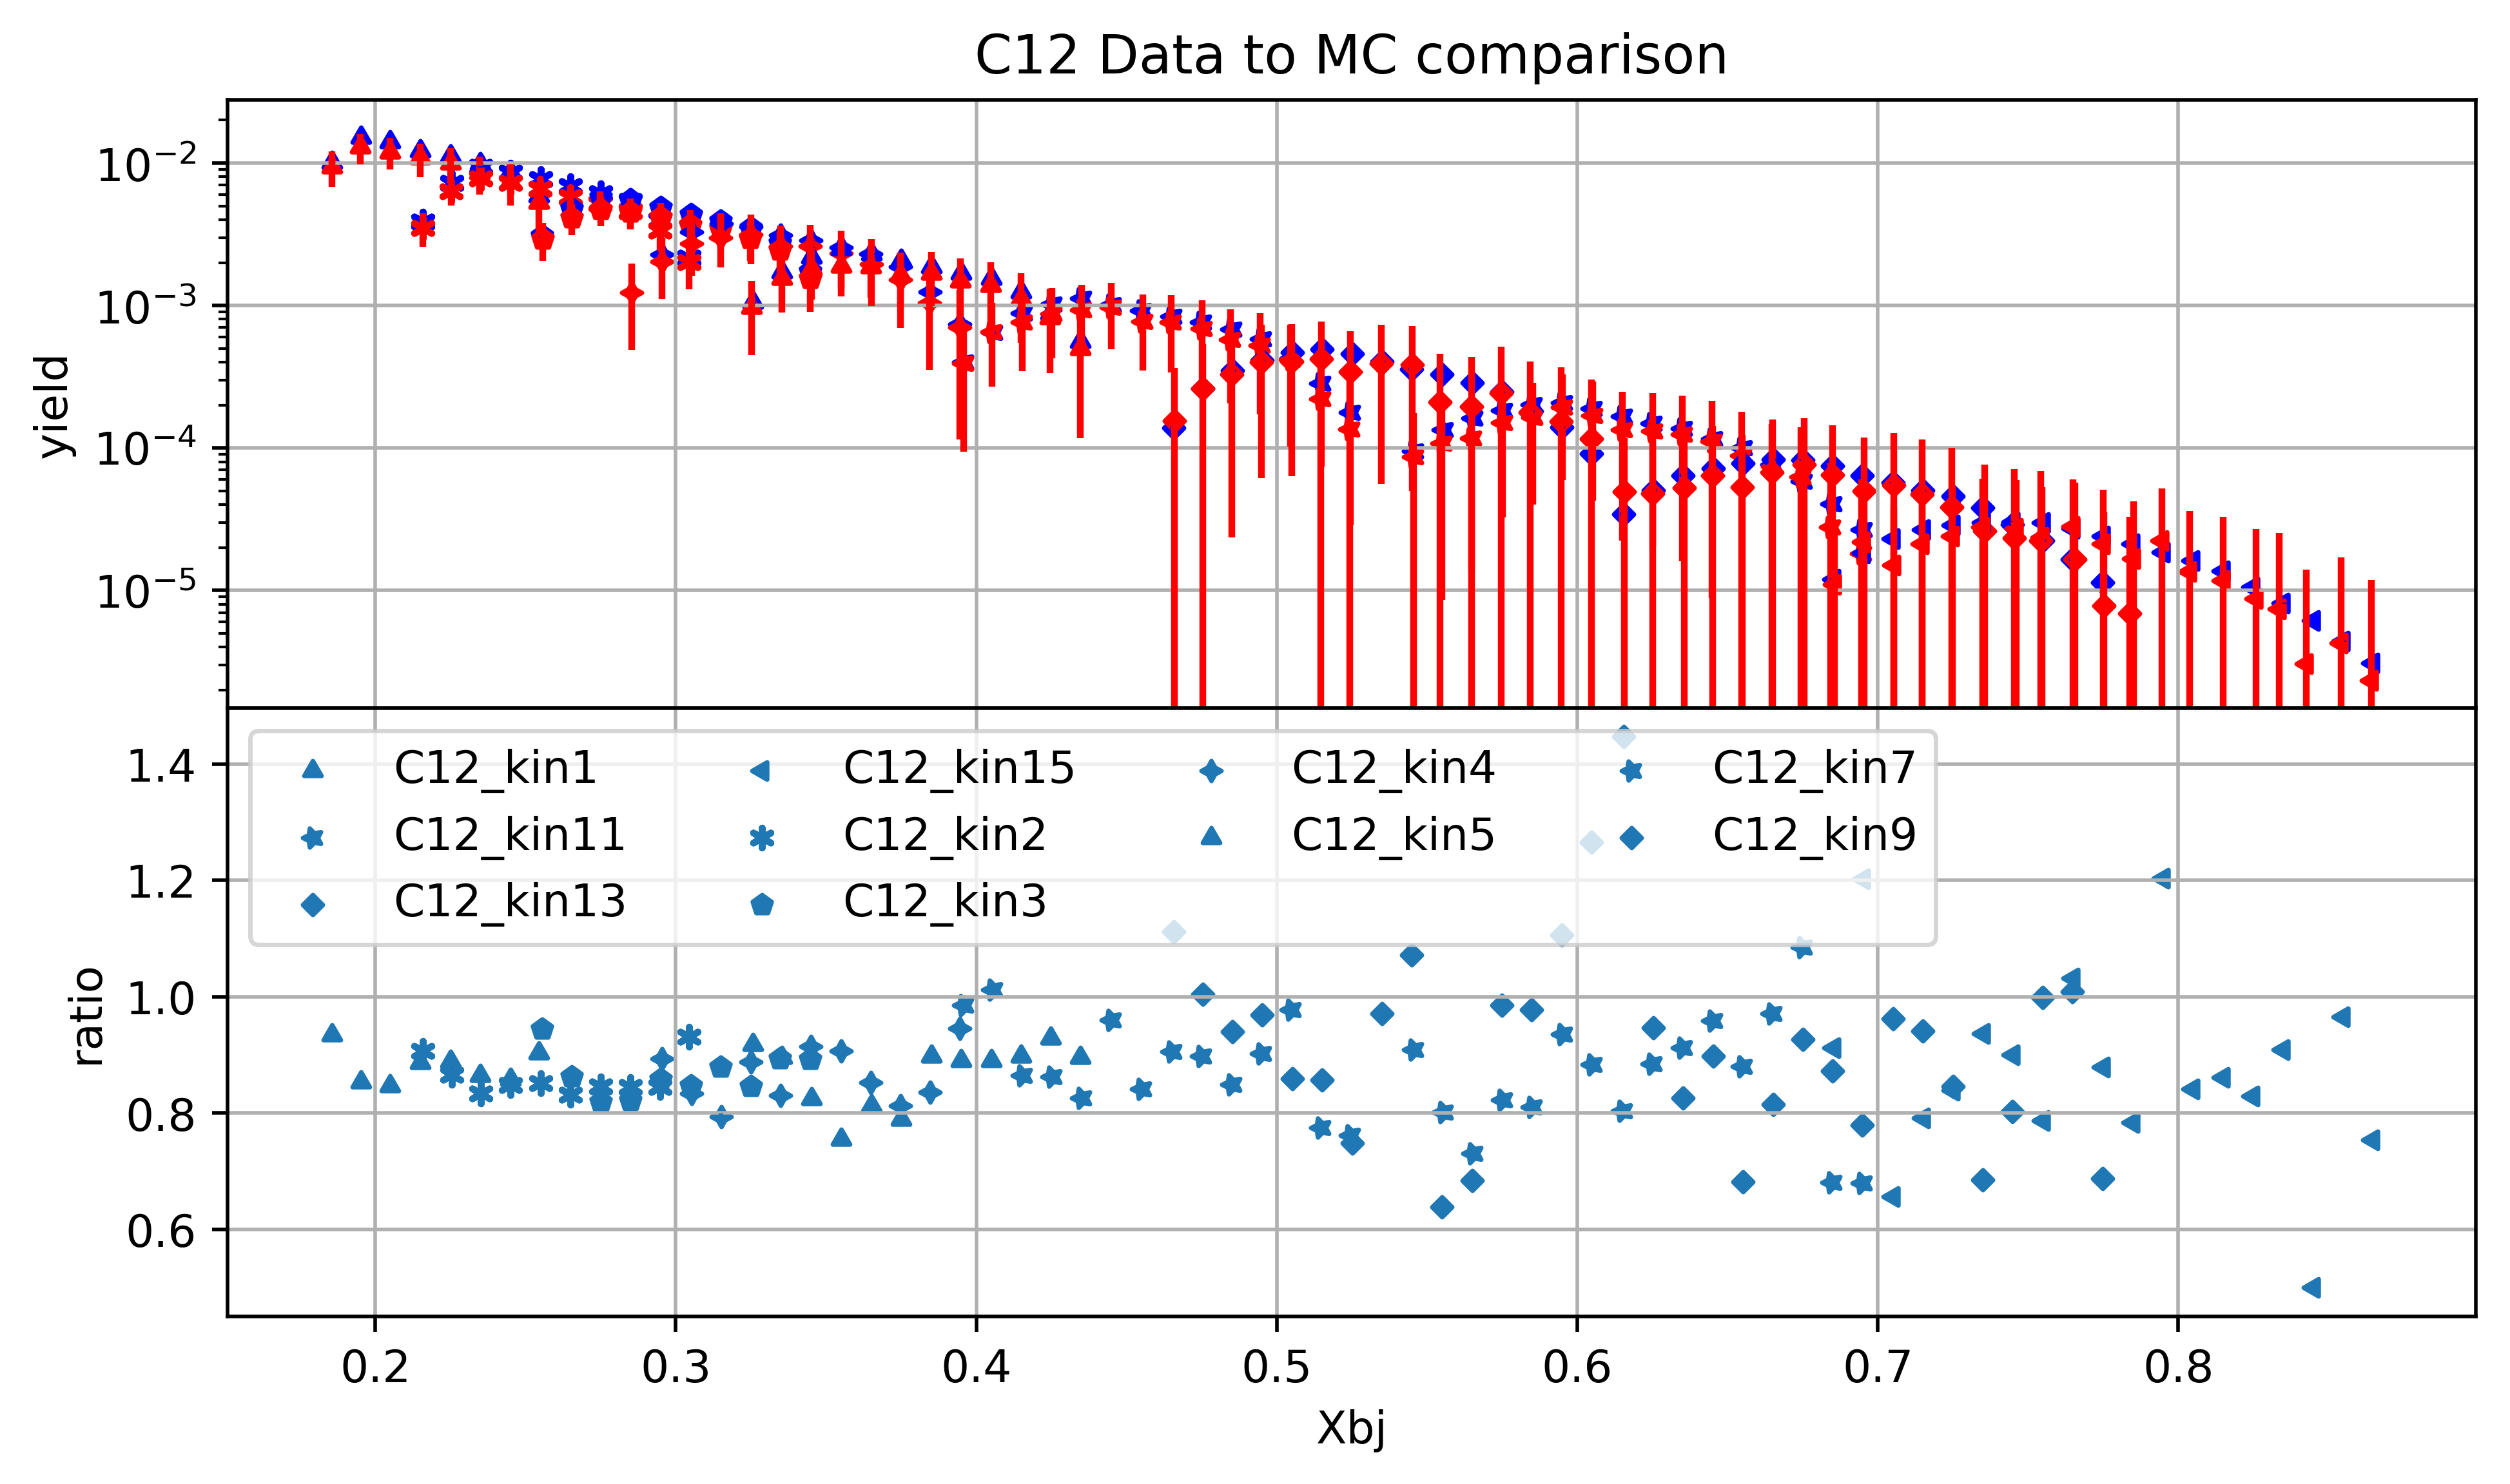

In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np


bins=100
tgt="C12"
cuttype=""
Xaxis="Xbj" #theta / Xbj
if Xaxis == "Xbj":
    xaxis="xbj"
else :
    xaxis="theta"

    
#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
#print( "Will look at runs ", runs)

mcfile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}/{}bins/{}/'.format(cuttype,bins,xaxis)
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/{}/{}bins/{}/'.format(cuttype,bins,xaxis)
kins={}
kin={}

kins=sorted(glob.glob('{}{}*.dat'.format(mcfile,tgt)))

mcDF={}
dataDF={}
mcDFs={}
dataDFs={}
ratios={}
i=0
for i in range(len(kins)):
    kin[i] = kins[i].replace(mcfile,"")
    kin[i] = kin[i].replace('.dat',"")
   # if kin[i]== 'D2_kin3':
   #     break
    #print(kin[i])
    mcfileR=mcfile+'{}.dat'.format(kin[i])
    datafileR=datafile+'{}.dat'.format(kin[i])
    print(datafileR)
    print(mcfileR)
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
    else:
        ("MC file does not exist") 
        chk=0
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("Data file does not exist")
        chk1=0
    if chk==0 or chk1==0:
        continue     
    print(kin[i])
        
    mcDF[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    mcDF[i]['yield']=mcDF[i]['Yield']/1000.0
    mcDF[i]['Error']=mcDF[i]['Error']/1000.0
    
    dataDF[i]['yield']=dataDF[i]['Yield']
    mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=mcmed *0.5]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.5]
    mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    #drop the first 2 and last 2 bins
    
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    dl=len(dataDFs[i])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-2])    
    
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
    ml=len(dataDFs[i])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-1])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-2])
    
    
   
    if len(dataDFs[i]) <2 :
            continue
            
                #cut out the edge bins for now
    dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    last= len(dataDFs[i].index)
    lastmc = len(mcDFs[i].index)
    dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-1])
    mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[lastmc-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-2])
    
    minind= dataDFs[i].index[0]
    maxind=dataDFs[i].index[len(dataDFs[i].index)-1]
    
   # mcDFs[i]=mcDFs[i][mcDFs[i].index>=minind]
   # mcDFs[i]=mcDFs[i][mcDFs[i].index<=maxind]        
            
    
    print(i, dataDFs[i])
    print(i,mcDFs[i])
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    dataDFs[i]['Stat_err']=1.0/np.sqrt((dataDFs[i]['Ne']))*dataDFs[i]['yield']*10
    ratios[i] = mcDFs[i].copy()
    #ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = mcDFs[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/mcDFs[i]['yield']
    ratios[i]['offset'] = dataDFs[i]['yield'] - mcDFs[i]['yield']
 
    i=i+1
    
import matplotlib._color_data as mcd
overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[7,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0],[4,1,0],[7,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Mint','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]
fig= plt.figure(dpi=500,figsize=(9,5))
ax=fig.add_subplot(2,1,1)
plt.title('{} Data to MC comparison'.format(tgt))
bx=fig.add_subplot(2,1,2, sharex=ax)

print("")
print( "Start drawing")
print("")

#fig,bx=plt.subplots(dpi=250)
k=int(0)
for j in range(len(mcDF)):
    xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    #print(j , len(ratios[j]))
    #print()
    if k == 7:
        k = 0
    if(len(dataDFs[j])) == 0:
        continue
    if(len(mcDF[j])) ==0:
        continue
    if(len(ratios[j])) ==0:
        continue
    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
        
    mcDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Error',kind='scatter',marker=markers[k], color='blue', label='MC {}'.format(kin[j]))
    
    dataDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',kind='scatter', marker=markers2[k], color='red', label='data {}'.format(kin[j]))
    ratios[j].plot(ax=bx,x='{}'.format(Xaxis) ,y='ratio', xerr='offset', kind='scatter', label='{}'.format(kin[j]),marker=markers2[k] )
    k=k+1
    print(j , kin[j])    
ax.set_yscale("log")
ax.grid(True)
bx.grid(True)
ax.legend(ncol=4)
ax.get_legend().remove()
bx.legend(ncol=4)

fig.subplots_adjust(hspace=0)
fig.savefig('images/{}_all.png'.format(tgt))


In [40]:
ratios

{0:          Xbj       Q2    Ne     Yield     Error     yield    data_Y      MC_Y  \
 18  0.185620  2.62928  4145   9.84455  0.000153  0.009845  0.009415  0.009845   
 19  0.195225  2.75167  6741  14.81340  0.000180  0.014813  0.012909  0.014813   
 20  0.204998  2.88539  7342  14.57550  0.000170  0.014575  0.011959  0.014575   
 21  0.215029  3.02669  7088  12.59240  0.000150  0.012592  0.010848  0.012592   
 22  0.224945  3.16609  7076  11.30520  0.000134  0.011305  0.009969  0.011305   
 23  0.234976  3.30714  6696   9.63269  0.000118  0.009633  0.008567  0.009633   
 24  0.244929  3.44681  6527   8.48688  0.000105  0.008487  0.007411  0.008487   
 25  0.254533  3.56861  4984   6.03097  0.000085  0.006031  0.005284  0.006031   
 
        ratio    offset  
 18  0.956415 -0.000429  
 19  0.871427 -0.001905  
 20  0.820480 -0.002617  
 21  0.861496 -0.001744  
 22  0.881815 -0.001336  
 23  0.889407 -0.001065  
 24  0.873224 -0.001076  
 25  0.876095 -0.000747  ,
 4:          Xbj      

In [10]:
kins\

<generator object _iglob at 0x7f7f6d1c53b8>

In [58]:
runDF= pd.read_table('./yield_output/byrun/1282.dat', delim_whitespace=True)

fullDF=pd.read_table('./yield_output/theta/He3_kin3.dat',delim_whitespace=True)




In [64]:
runDF=runDF.dropna()
fullDF=fullDF.dropna()

In [65]:
runDF

,theta,:Ne,yield,:error
2,18.5795,5,0.000001,5.293280e-07
3,19.2148,4045,0.001278,2.009660e-05
4,19.9017,8849,0.002386,2.536070e-05
5,20.7751,8933,0.001886,1.994970e-05
6,21.6099,7972,0.001330,1.489340e-05
7,22.2322,1229,0.000161,4.602590e-06


In [66]:
fullDF

,theta,Ne,Yield,Error
2,18.5821,36,0.004008,0.000001
3,19.2180,39383,5.170960,0.001609
4,19.9051,86102,9.676050,0.002557
5,20.7756,85768,7.578370,0.001562
6,21.6107,78546,5.477780,0.000886
7,22.2379,11878,0.653709,0.000082


In [70]:
rat=fullDF.copy()
rat['ratio']=runDF['yield']/fullDF['Yield']

In [72]:
rat['ratio']=rat['ratio']*1000

In [73]:
rat

,theta,Ne,Yield,Error,ratio
2,18.5821,36,0.004008,0.000001,0.295293
3,19.2180,39383,5.170960,0.001609,0.247178
4,19.9051,86102,9.676050,0.002557,0.246553
5,20.7756,85768,7.578370,0.001562,0.248805
6,21.6107,78546,5.477780,0.000886,0.242757
7,22.2379,11878,0.653709,0.000082,0.246828
